### CA1 @ EPS Course
#### Instructors: Dr. Bahrak, Dr. Vahabie
##### TAs: Sepanta Ghonoodi, Mohammad Khoshroo
---

*Full Name:* Amirreza Daei

*SID:* 810103407

---

# R tutorial:
You can access a notebook introducing basic R syntax and functions here, if you are interested:

[Comprehensive R Programming Tutorial](https://colab.research.google.com/drive/1xOqhkMF-5DVmjHHdPtjDfi7_CaRvZjDk?usp=sharing)

You can access first computer assignment from one of the previous semesters here:

[CA1](https://colab.research.google.com/drive/13I9i0DwUgy7Nji1Ab6832pdAatXjnLuS?usp=sharing)

# Frequency Definition of Probability


One way of deﬁning the probability of an event is in terms of its relative frequency.

$$P(E) = \lim_{n \to \infty} \frac{n(E)}{n} $$

Where

$E$: an Event from the Sample Space S

$n$: Total number of experiments

$n(E)$: Number of times in the ﬁrst n repetitions of the experiment that the event E occurs


### Defining sample space and probability of each event


In [1]:
S <- seq(1,6)
prob_dice <- rep(1/6, 6)

### Sampling(5 pts)


In [2]:
roll_dice <- function(n) {
    sample(S, n, replace = TRUE)
}

roll_dice(10)

[1] 1 4 4 4 6 4 1 5 4 5

# Problem 1: Galileo's Problem(55 pts)


Suppose three dice are thrown and the three numbers obtained added. The total scores of 9, 10, 11, and 12 can all be obtained in six different combinations. Why then is a total score of 10 or 11 more likely than a total score of 9 or 12?


We now there are 6 ways to get a sum of 9, if you ignore the order of the dice:

- 3 + 3 + 3
- 2 + 3 + 4
- 2 + 2 + 5
- 1 + 4 + 4
- 1 + 3 + 5
- 1 + 2 + 6

and 6 ways to get a sum of 10:

- 3 + 3 + 4
- 2 + 4 + 4
- 2 + 3 + 5
- 2 + 2 + 6
- 1 + 4 + 5
- 1 + 3 + 6

So Based on classical definition of probability shouldn't they be equally likely?

let's figure out with sampling!


###  Simulating rolling n dices k times(5 pts)

Use `replicate()` function to simulate rolling 3 dices at a time


In [3]:
sum_of_n_dices <- function(n, k) {
	replicate(k, sum(sample(S, n, replace = TRUE)))
}

### Generate and Store Samples(10 pts)

Now repeat the experiment with 3 dices $10^k$ times, for k ranging from 2 to 6.

For each k:

- Count how many times we have a sum of 9, 10, 11, 12.
- Calculate the probability using frequency definition
- Store these probabilities in a data frame

You can use `table()` and `factor()` function to count the results if necessary.


In [4]:
sample_sizes <- 10^(2:6)
result <- data.frame (
    trials = sample_sizes,
    p9 = NA,
    p10 = NA,
    p11 = NA,
    p12 = NA
)

for(i in seq_along(sample_sizes)) {
    trials_cnt <- sample_sizes[i]
    sums <- sum_of_n_dices(3, trials_cnt)
    cnts <- table(factor(sums, levels = 3:18))
    probs <- cnts[c("9", "10", "11", "12")] / trials_cnt
    result[i, 2:5] <- probs
}

print(result)

  trials       p9      p10      p11     p12
1  1e+02 0.080000 0.130000 0.120000 0.14000
2  1e+03 0.120000 0.129000 0.107000 0.12000
3  1e+04 0.112700 0.127100 0.118100 0.11560
4  1e+05 0.115050 0.125280 0.125930 0.11624
5  1e+06 0.115896 0.124369 0.124607 0.11575


### Visualize Probabilities(15 pts)


Plot the probabilities of the sums (9, 10, 11, 12) for 3 dices in a bar plot by completing the function.


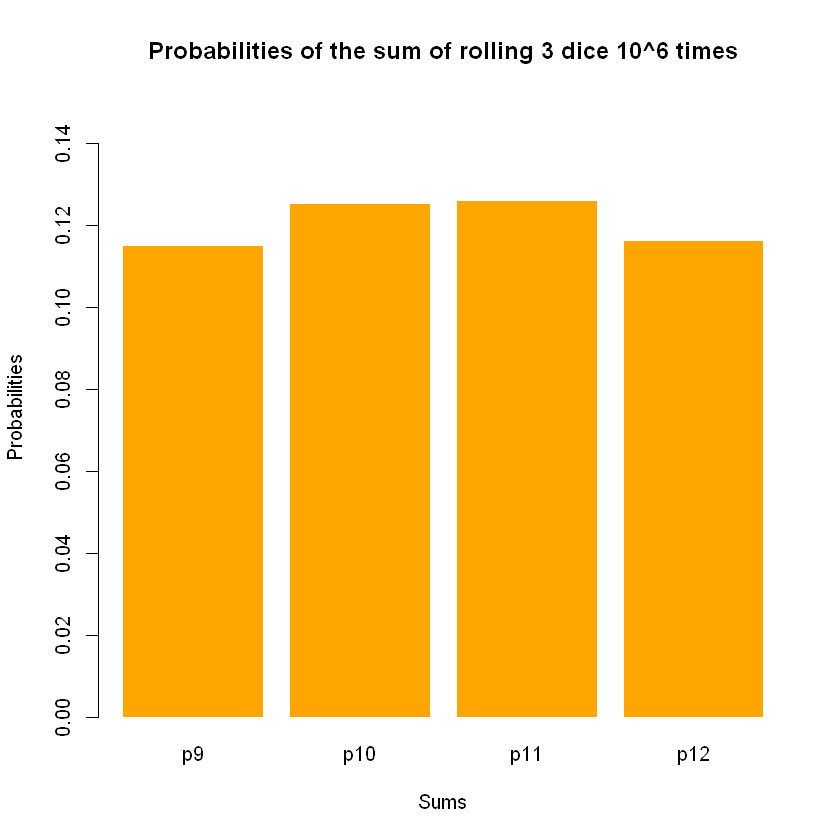

In [5]:
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")

plot_probabilities <- function(names, probs) {
    barplot(
        probs,
        names.arg = names,
        col = "orange",
		border = NA,
        main = "Probabilities of the sum of rolling 3 dice 10^6 times",
		ylim = range(0, max(probs) * 1.2),
        ylab = "Probabilities",
        xlab = "Sums"
    )
}

probs <- as.numeric(result[4, 2:5])
names <- colnames(result)

plot_probabilities(names[2:5], probs)

- What do you see? Was ignoring count of permutations in the beginning correct or there is problem with the experiment?

    Answer: There is problem with that

- Why doesn't classical definition of probability doesn't apply here?

    Answer: Because they have unequal probability

### Showing the correct value(15 pts)


Calculate the exact probability of the sum of three dice being 9 and 10 (you don’t need to show the detailed calculations in the notebook).

Use a line plot to demonstrate that, as the number of experiments increases, the relative frequencies converge to the calculated probabilities.

Add a horizontal line to indicate the calculated probability in the plot.

Use a logarithmic scale for the sample sizes on the chart.

In [6]:
sample_sizes <- c(seq(100,1000,200), seq(1000,10000,2000), seq(10000,100000,
20000), seq(100000,1000000,200000))

result <- data.frame(
    trials = sample_sizes,
    p9 = NA,
    p10 = NA
)

for(i in seq_along(sample_sizes)) {
    trials_cnt <- sample_sizes[i]
    sums <- sum_of_n_dices(3, trials_cnt)
    cnts <- table(factor(sums, levels = 3:18))
    probs <- cnts[c("9", "10")] / trials_cnt
    result[i, 2:3] <- probs
}

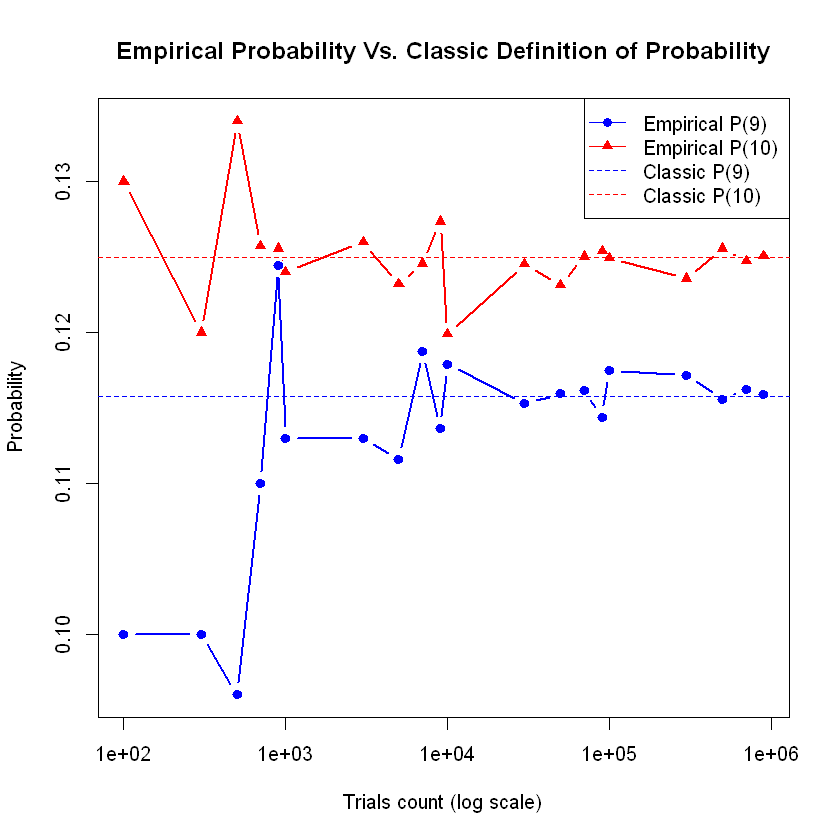

In [7]:
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")

plot(
	result$trials,
	result$p9,
	type = "b", 
	col = "blue", 
	pch = 19, 
	lwd = 2,
	log = "x",
	ylim = range(c(result$p9, result$p10, 25/216, 27/216)),
	xlab = "Trials count (log scale)",
	ylab = "Probability",
	main = "Empirical Probability Vs. Classic Definition of Probability"
)

lines(
	result$trials,
	result$p10,
	type = "b",
	col = "red",
	pch = 17,
	lwd = 2
)

abline(
	25/216,
	0,
	col = "blue",
	lwd = 1,
	lty = 2
)
abline(
	27/216,
	0,
	col = "red",
	lwd = 1,
	lty = 2
)

legend(
	"topright",
	legend = c("Empirical P(9)", "Empirical P(10)", "Classic P(9)", "Classic P(10)"),
	col = c("blue", "red", "blue", "red"),
	lty = c(1, 1, 2, 2),
	pch = c(19, 17, NA, NA)
)

### Increasing Number of Dices(10 pts)
Here, we analyze the distribution of dice sums and observe how it evolves with an increasing number of dice.

In [8]:
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")
plot_distribution_of_sum_of_n_dices <- function(n, k) {
    sums <- sum_of_n_dices(n, k)
    cnts <- table(factor(sums, levels = (1*n):(6*n)))
    probs <- cnts / k
	barplot(
        probs,
        names.arg = (1*n):(6*n),
		border = "orange",
        col = "orange",
        main = paste("Probabilities of the sum of rolling", n, "dice", format(k, big.mark = ",", scientific = FALSE), "times"),
        ylab = "Probabilities",
        xlab = "Sums",
		ylim = c(0, max(probs) * 1.3)
    )
}

Call `plot_distribution_of_sum_of_n_dices` with different dice counts and 10⁵ experiments.

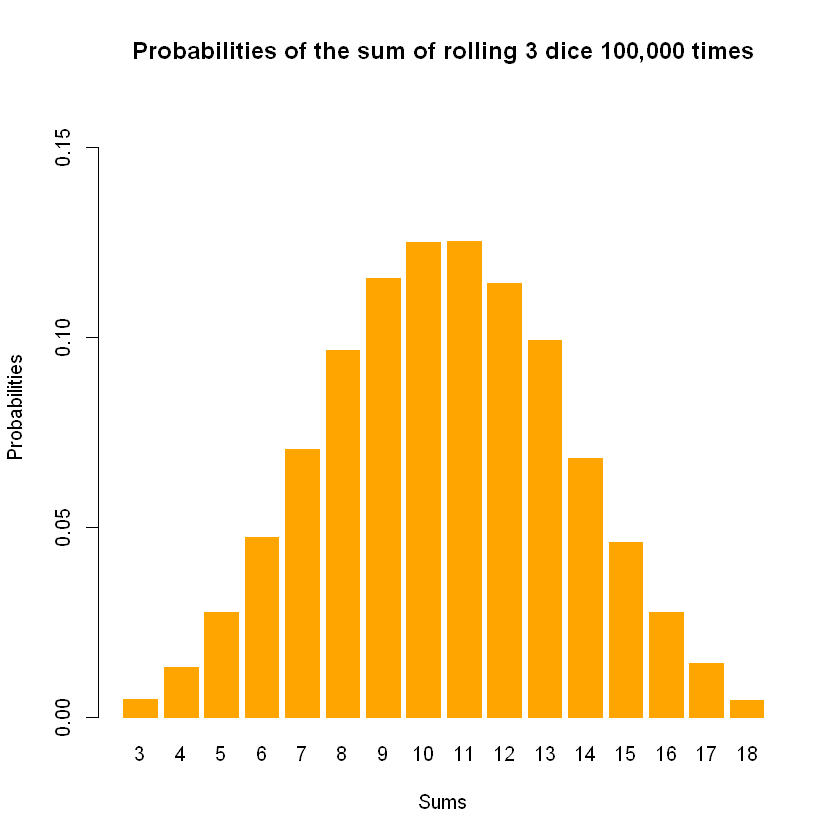

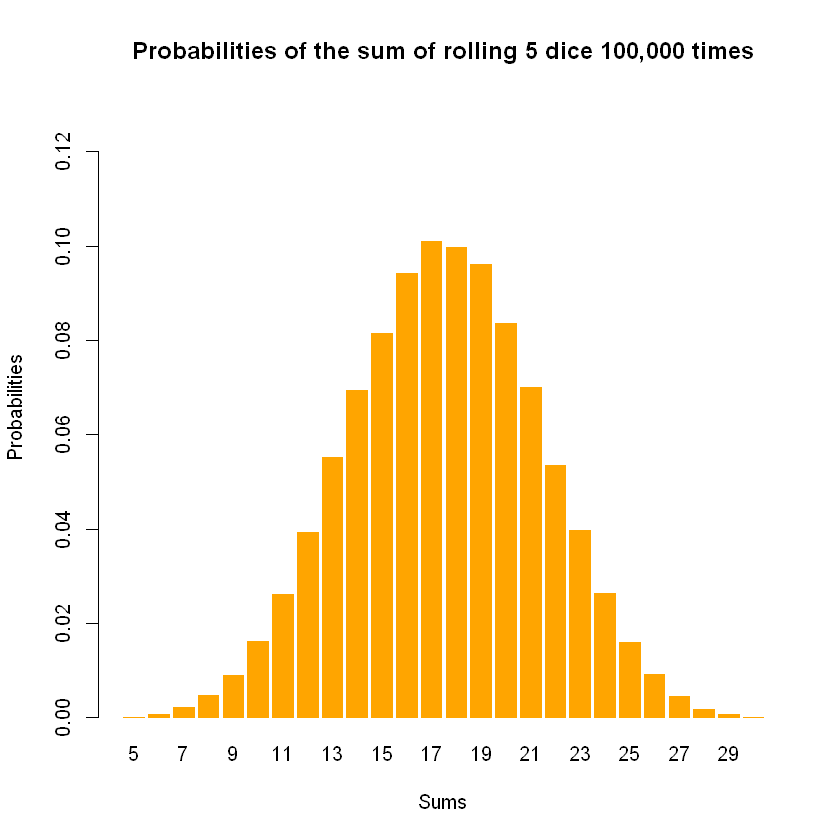

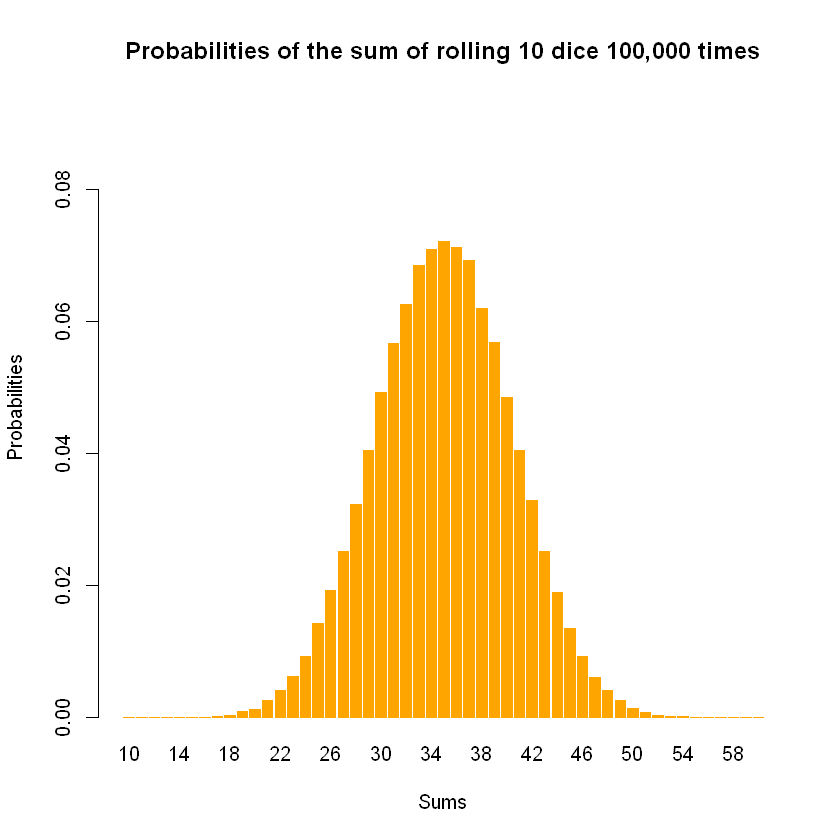

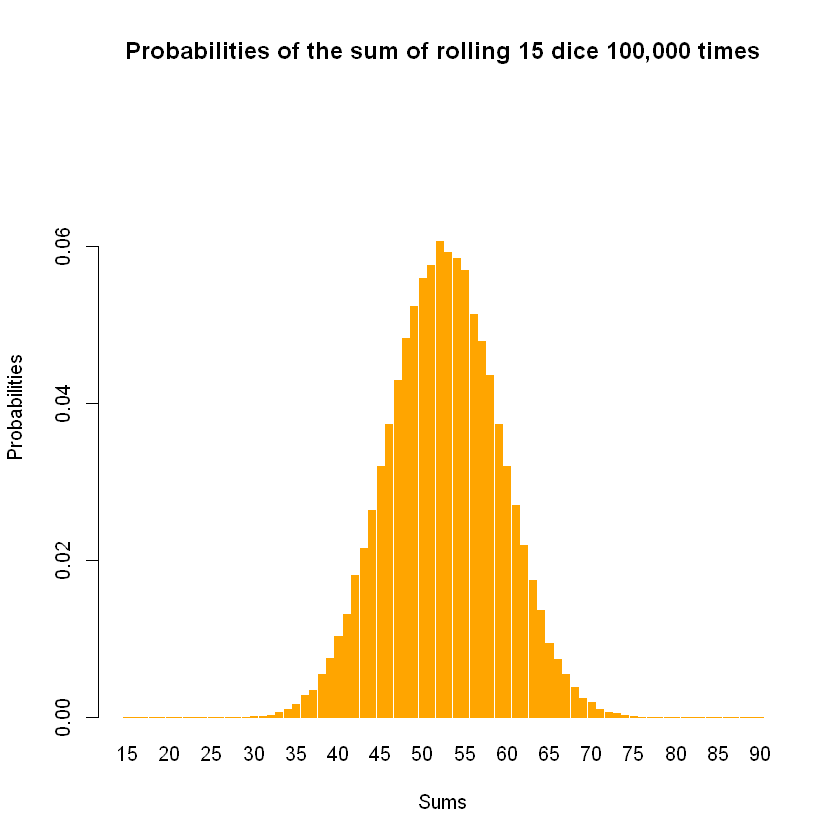

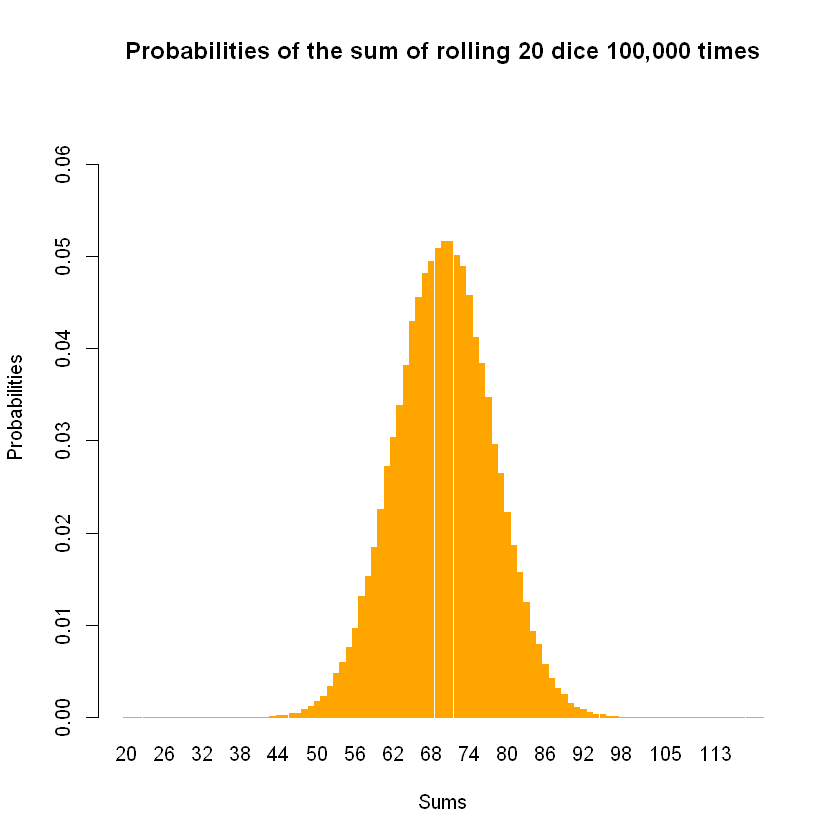

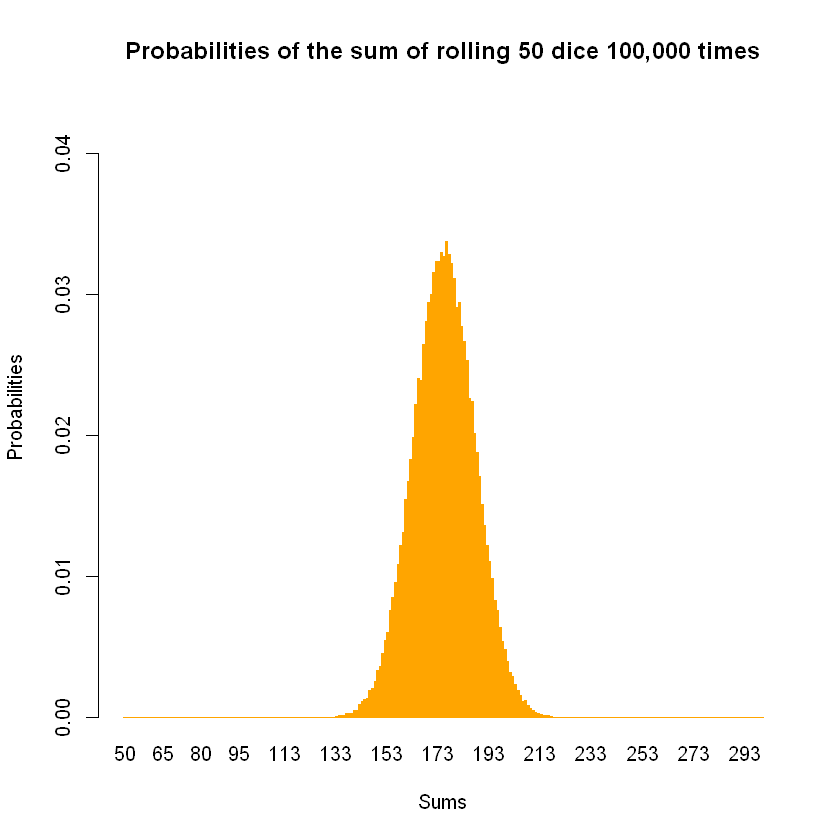

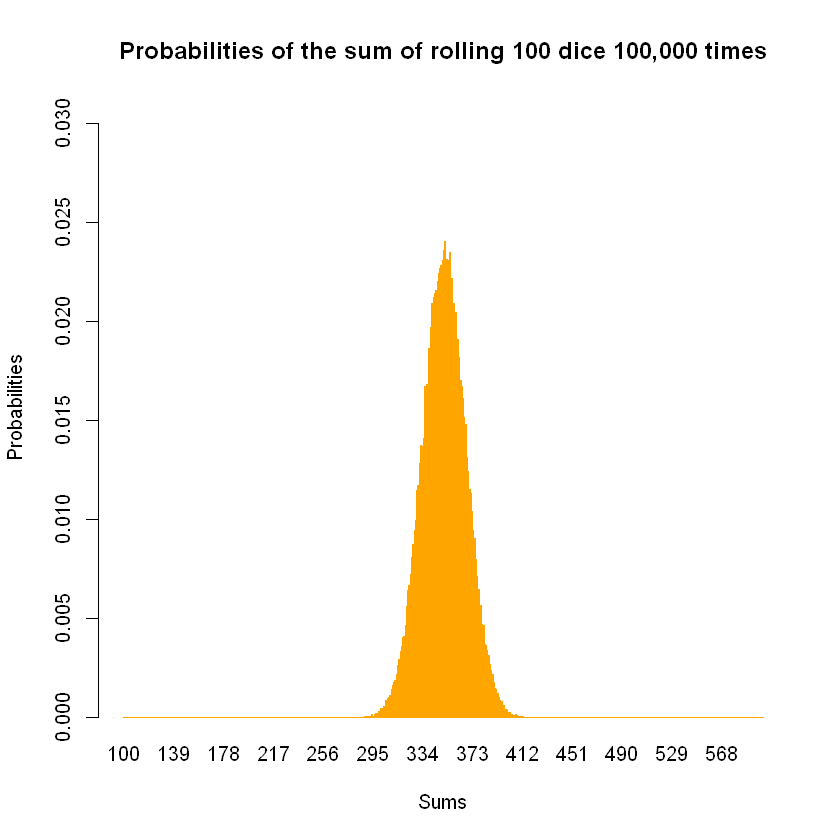

In [9]:
dice_counts <- c(3,5,10,15,20,50,100)
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")
for(i in seq_along(dice_counts)) {
	plot_distribution_of_sum_of_n_dices(dice_counts[i], 10^5)
}

# Problem 2: New class order(40 pts)


In this question you will see that some probability problems are very hard to solve by theory, but become much easier if you use sampling and the frequentist interpretation of probability.


In a university classroom, n students are sitting in a row. After the class ends, they all go outside for a break. When they return, they decide to sit again on the same row, but this time they each choose a seat at random, resulting in a uniform random permutation of the seating order.

Since every pair of neighbors had an argument during the first class and now hate each other, the students want to know:

What is the probability that, in the new seating, There exists two students that sit next to someone they were seated next to in the original arrangement?


### Step 1: Simulate a random sitting order(5 pts)


In [10]:
random_sitting_order <- function(n){
	sample(n)
}

### Step 2: create a new permutation and find if there are similar neighbors(10 pts)


Suppose students are initially seated in order from 1 to n. In the next arrangement, they are placed in a new random order. Determine whether any two neighbors from the original order remain neighbors in the new order.

In [11]:
has_similar_neighbors <- function(students_count){
	arrangement <- random_sitting_order(students_count)
	for(i in seq_along(arrangement)) {
		if(i != length(arrangement)) {
			if(abs(arrangement[i] - arrangement[i + 1]) == 1) {
				return(TRUE)	
			}
		}
	}
	return(FALSE)
}

### Step3: Conduct the experiment N times(5 pts)


Here you should:
- Conduct the experiment N times.
- See how many times there are similar neighbors
- Calculate probability using frequency definition and return it.

In [12]:
similar_neighbors_probability <- function(N, students_count){
	true_cnt <- 0
	for(i in 1:N) {
		if(has_similar_neighbors(students_count)) {
			true_cnt = true_cnt + 1
		}
	}
	return(true_cnt / N)
}

### Step 4:(10 pts)
Conduct the experiment for these sample sizes with 5 students.

Print the probabilities for each sample size.

In [13]:
sample_sizes <-  c(seq(100,1000,200), seq(1000,10000,2000), seq(10000,100000,20000), seq(100000,1000000,200000))
result <- data.frame(
	trials = sample_sizes,
	probs = NA
)

for(i in seq_along(sample_sizes)) {
	trials_cnt <- sample_sizes[i]
	result[i, 2] <- similar_neighbors_probability(trials_cnt, 5)
}

print(result)

   trials     probs
1   1e+02 0.9300000
2   3e+02 0.8633333
3   5e+02 0.8940000
4   7e+02 0.8900000
5   9e+02 0.8944444
6   1e+03 0.9000000
7   3e+03 0.8793333
8   5e+03 0.8810000
9   7e+03 0.8808571
10  9e+03 0.8871111
11  1e+04 0.8807000
12  3e+04 0.8816333
13  5e+04 0.8836600
14  7e+04 0.8838286
15  9e+04 0.8843111
16  1e+05 0.8835500
17  3e+05 0.8833167
18  5e+05 0.8840400
19  7e+05 0.8833500
20  9e+05 0.8833233


Show the probabilities in the You calculated in a line chart.

Use log scale for sample sizes.

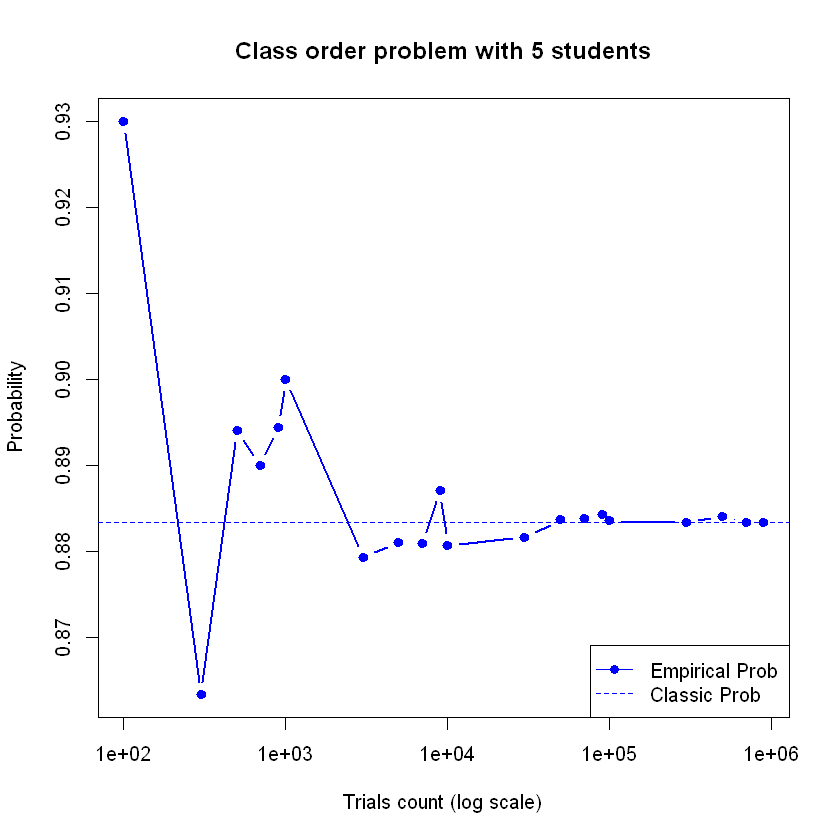

In [14]:
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")
plot(
	result$trials,
	result$probs,
	log = "x",
	type = "b", 
	col = "blue", 
	pch = 19, 
	lwd = 2,
	ylim = range(min(result$probs), max(result$probs)),
	xlab = "Trials count (log scale)",
	ylab = "Probability",
	main = "Class order problem with 5 students"
)

abline(
	1 - (14 / factorial(5)),
	0,
	col = "blue",
	lwd = 1,
	lty = 2
)

legend(
	"bottomright",
	legend = c("Empirical Prob", "Classic Prob"),
	col = c("blue", "blue"),
	lty = c(1, 2),
	pch = c(19, NA)
)

### Step 5:(10 pts)
In this step, we want to examine the effect of increasing the number of students on the probability.

Calculate the probability that two students sit next to each other again, using a sample size of $10^6$, for 3 to 20 students.

Display the results in a line chart.

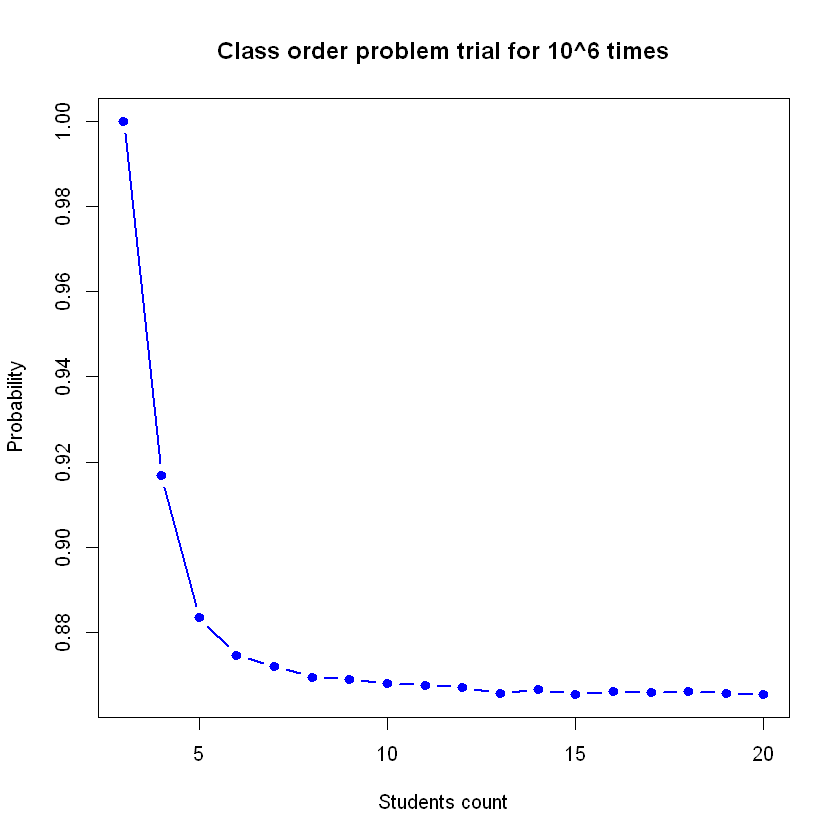

In [15]:
par(bg = "white", col.axis = "black", col.lab = "black", col.main = "black", col.sub = "black")
students_cnts <- 3:20
result <- data.frame(
	students = students_cnts,
	probs = NA
)

for(i in seq_along(students_cnts)) {
	result[i, 2] <- similar_neighbors_probability(10^6, students_cnts[i])
}

plot(
	result$students,
	result$probs,
	type = "b", 
	col = "blue", 
	pch = 19, 
	lwd = 2,
	ylim = range(min(result$probs), max(result$probs)),
	xlab = "Students count",
	ylab = "Probability",
	main = "Class order problem trial for 10^6 times"
)

Now you can see the theoretical way to solve this question using inclusion-exclusion principle.
(Reading part is optional and This part is meant to show you that in some problems sampling is much easier.)

We assume that the initial order of seating is $A, B, C, D$.

We define a function $T(XY)$ that indicates the number of arrangements in which $X$ and $Y$ are seated next to each other.

We know that the total number of arrangements is $5!$. Now, we can determine the number of undesirable cases using Inclusion-Exclusion principle.
$$
\big(|T(AB)| + |T(BC)| + |T(CD)| + |T(DE)|\big)
- \big(|T(AB) \cap T(BC)| + |T(AB) \cap T(CD)| + |T(AB) \cap T(DE)| + \cdots \big) + \cdots
$$

In the above expression, each sentence cannot be calculated separately.
$$|T(AB)| = |T(BC)| = |T(CD)| = |T(DE)| = 2 \times 4! = 48$$


In the case of invalid sequences, we have 4 sequences in the form
$(|T(XY)|)$.

Therefore, in total we will have:
$ 48 \times 4 = 192 $ undesirable elements.

$$|T(AB) \cap T(BC)| = |T(BC) \cap T(CD)| = |T(CD) \cap T(DE)| = 2 \times 3! = 12$$

The expression $T(BC) \cap T(AB)$ represents the set of sequences in which $A$ and $B$ are adjacent, and $B$ and $C$ are also adjacent.
In the case of invalid sequences, we have 3 sequences in this form; thus, in total we will have:  $12 \times 3 = 36 $

$$|T(AB) \cap T(CD)| = |T(AB) \cap T(DE)| = |T(BC) \cap T(DE)| = 2^2 \times 3! = 24$$

The expression $T(AB) \cap T(CD)$ represents the set of sequences in which $A$ and $B$ are adjacent, and $C$ and $D$ are also adjacent.
In the case of invalid sequences, we have 3 sequences in this form; thus, in total we will have:  $24 \times 3 = 72 $

$$|T(AB) \cap T(BC) \cap T(CD)| =$$
$$|T(BC) \cap T(CD) \cap T(DE)| = 2 \times 2! = 4$$


The expression $T(AB) \cap T(BC) \cap T(CD)$ represents the set of sequences in which $A$, $B$, $C$ and $D$ are adjacent.
In the case of invalid sequences, we have 2 sequences in this form; thus, in total we will have:  $2 \times 4 = 8 $

$$|T(AB) \cap T(BC) \cap T(DE)| =$$
$$|T(AB) \cap T(CD) \cap T(DE)| = 2^2 \times 2! = 8$$


The expression $T(AB) \cap T(BC) \cap T(DE)$ represents the set of sequences in which $A$, $B$ and $C$  are adjacent, and $D$ and $E$ are also adjacent.
In the case of invalid sequences, we have 2 sequences in this form; thus, in total we will have:  $2 \times 8 = 16 $


$$|T(AB) \cap T(BC) \cap T(CD) \cap T(DE)| = $$ $$2 \times 1! = 2$$

The expression $T(AB) \cap T(BC) \cap T(CD) \cap T(DE)$ represents a set of arrangements
in which each individual is next to individuals who were next to them in previous arrangements.
This set has only two members.

Therefore all invalid sequences will be:
$$192-(36+72)+(8+16)-2 = 106$$

And valid sequences will be:

$$5!-106 = 14 $$
And the desired probability(probability of each person sitting next to a new person):
$$\frac{14}{5!} = 0.116667$$
The probability that there exists a pair sitting next to each other again is:
$$ 1- \frac{14}{5!} = 0.8833 $$
Does this match with your observation?
